In [24]:
# Config
import copy
import os
import numpy as np
from numpy.linalg import norm
import matplotlib
import matplotlib.pyplot as plt

# Path for ffmpeg (if animations are needed)
plt.rcParams['animation.ffmpeg_path'] = "C:\\Users\\Fredric\\Documents\\ffmpeg\\ffmpeg-n4.4-latest-win64-gpl-4.4\\bin\\ffmpeg.exe"

# Path for .pkl files output
target_dir = "C:\\Users\\Fredric\\Documents\\Volcano\\quail_volcano\\scenarios\\blast\\"

# Path for Quail source code
source_dir = "C:\\Users\\Fredric\\Documents\\Volcano\\quail_volcano\\src\\"

# Path for Quail entry point
quail_path = os.path.join(source_dir, "quail")

In [25]:
%load_ext autoreload
%autoreload 2

# Import quail modules
os.chdir(source_dir)
import argparse
import importlib
import sys

import defaultparams as default_deck
import errors
from general import ShapeType, SolverType, PhysicsType

import meshing.common as mesh_common
import meshing.gmsh as mesh_gmsh
import meshing.tools as mesh_tools

import numerics.helpers.helpers as helpers
import numerics.timestepping.tools as stepper_tools

import physics.zerodimensional.zerodimensional as zerod
import physics.euler.euler as euler
import physics.navierstokes.navierstokes as navierstokes
import physics.scalar.scalar as scalar
import physics.chemistry.chemistry as chemistry
import physics.multiphasevpT.multiphasevpT as multiphasevpT

import processing.readwritedatafiles as readwritedatafiles
import processing.post as post
import processing.plot as plot
import processing
import processing.mdtools as mdtools

import solver.DG as DG
import solver.ADERDG as ADERDG
import solver.tools as solver_tools

import time
import multiprocessing as mp
from multidomain import Domain, Observer

os.chdir(target_dir)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
solver1D_from = lambda i: readwritedatafiles.read_data_file(
  f"refblastB_cond_{i}.pkl")

In [46]:
solver = solver1D_from(4) #220 last

t = 0.600000 s


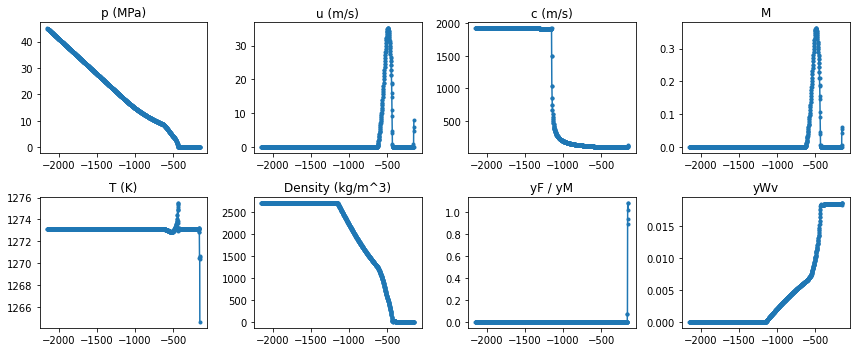

In [47]:
physics = solver.physics
cv = physics.compute_variable
U = solver.state_coeffs
x = solver.elem_helpers.x_elems
p = cv("Pressure", U)
u = cv("XVelocity", U)
c = cv("SoundSpeed", U)
T = cv("Temperature", U)
rho = U[...,0:3].sum(axis=-1, keepdims=True)
yF = U[...,7:8] / rho
yWv = U[...,1:2] / rho
yM = U[...,2:3] / rho
plot_scalar = lambda q: plt.plot(x.ravel(), q.ravel(), '.-')

fig, ax = plt.subplots(figsize=(12,5))

quant_list = [
  ("p (MPa)", p/1e6),
  ("u (m/s)", u),
  ("c (m/s)", c),
  ("M", u/c),
  ("T (K)", T),
  ("Density (kg/m^3)", rho),
  ("yF / yM", yF / yM),
  ("yWv", yWv),
]

for i, (name, vals) in enumerate(quant_list):
  plt.subplot(2,4,i+1)
  plot_scalar(vals)
  plt.title(name)

plt.tight_layout()
print(f"t = {solver.time:.6f} s")